In [ ]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [ ]:
# root 資料存放位置，train 測試資料or訓練資料，transform 轉換格式，download 是否下載一份(非只在記憶體)
train_datasets = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_datasets = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_datasets.data.shape # 60000圖 28*28

torch.Size([60000, 28, 28])

In [ ]:
import matplotlib.pyplot as plt

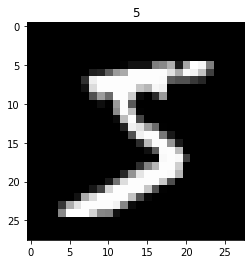

In [ ]:
plt.imshow(train_datasets.data[0].numpy(), cmap='gray') # 必須是Array，cmap(ColorMap)灰階
plt.title('%i'% train_datasets.targets[0])
plt.show()

In [ ]:
import torch.utils.data as Data

In [ ]:
#hyper parameters
batch_size = 100
input_size = 28 * 28
num_classes = 10
hidden_size = 500 # hidden layer，最好input_size和呈現倒三角形，較容易收斂
num_epochs = 5
learning_rate = 0.001

In [ ]:
train_loader = Data.DataLoader(dataset=train_datasets, batch_size=batch_size, shuffle=True)
test_loader = Data.DataLoader(dataset=test_datasets, batch_size=batch_size, shuffle=False)
test_y = test_datasets.targets # target 用來算正確率
test_y.shape

torch.Size([10000])

In [ ]:
import torch.nn as nn

In [ ]:
# 要用此類別建構物件時，必須 implement forward，但執行不會報錯
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Model, self).__init__()
    # 類別裡的變數
    self.fc1 = nn.Linear(input_size, hidden_size) # fully connected
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes) 
  
  def forward(self, x): # x 接收資料
    # 搭建網路
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

  # backward 用來計算所有的gradient，當沒有特殊gradient計算需求，不需要寫

In [ ]:
model = Model(input_size, hidden_size, num_classes) # 若沒有def forward，會報錯

In [ ]:
import torch.optim as opt

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = opt.Adam(model.parameters(), lr=learning_rate)

In [ ]:
from torch.autograd import Variable

In [ ]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = Variable(images.view(-1, 28 * 28)) # 將圖片攤平
    labels = Variable(labels)

    optimizer.zero_grad() # 越早越好
    outputs = model(images)
    loss = loss_fn(outputs, labels)    
    loss.backward() # backward 是利用 loss function 做 grad
    optimizer.step()

    if (i + 1) % 100 == 0:
      print('Epoch(%d), Batch(%d), Loss: %.4f' %(epoch + 1, i + 1, loss.data))

Epoch(1), Batch(100), Loss: 0.2741
Epoch(1), Batch(200), Loss: 0.2720
Epoch(1), Batch(300), Loss: 0.2172
Epoch(1), Batch(400), Loss: 0.2667
Epoch(1), Batch(500), Loss: 0.1902
Epoch(1), Batch(600), Loss: 0.1545
Epoch(2), Batch(100), Loss: 0.1947
Epoch(2), Batch(200), Loss: 0.0658
Epoch(2), Batch(300), Loss: 0.0917
Epoch(2), Batch(400), Loss: 0.1509
Epoch(2), Batch(500), Loss: 0.1394
Epoch(2), Batch(600), Loss: 0.0807
Epoch(3), Batch(100), Loss: 0.0869
Epoch(3), Batch(200), Loss: 0.0662
Epoch(3), Batch(300), Loss: 0.0695
Epoch(3), Batch(400), Loss: 0.0427
Epoch(3), Batch(500), Loss: 0.1046
Epoch(3), Batch(600), Loss: 0.0294
Epoch(4), Batch(100), Loss: 0.0326
Epoch(4), Batch(200), Loss: 0.0350
Epoch(4), Batch(300), Loss: 0.0242
Epoch(4), Batch(400), Loss: 0.0371
Epoch(4), Batch(500), Loss: 0.1353
Epoch(4), Batch(600), Loss: 0.0497
Epoch(5), Batch(100), Loss: 0.0095
Epoch(5), Batch(200), Loss: 0.0148
Epoch(5), Batch(300), Loss: 0.0436
Epoch(5), Batch(400), Loss: 0.0965
Epoch(5), Batch(500)

In [ ]:
import torch

In [ ]:
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1, 28 * 28))
  outputs = model(images)
  _, predicted = torch.max(outputs.data, 1) # 每一個row中最大的，不寫1則是整個tensor，回傳兩個變數，第二個才是需要的(0～9)
  total += labels.size(0)
  correct += (predicted == labels).sum() # True為1，將所有1加總 -> 正確的數量

print('%.3f %%' %(100.0 * float(correct) / float(total)))

97.720 %


In [ ]:
images.shape

torch.Size([100, 784])

<function matplotlib.pyplot.show>

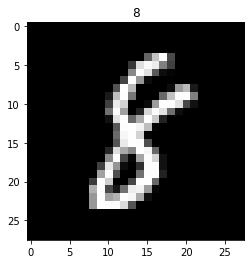

In [ ]:
plt.imshow(images.data[0].view(28,28),cmap='gray')
plt.title('%i' % labels[0])
plt.show

In [ ]:
predicted[0]

tensor(8)

##如何將訓練的模型帶走

方法一：儲存 Fully Connected Weight

In [ ]:
torch.save(model.state_dict(), 'model.pkl')

In [ ]:
model2 = Model(input_size, hidden_size, num_classes)

載入 Weight

In [ ]:
model2.load_state_dict(torch.load('model.pkl'))
print(model2) # 檢查架構(還不能確定是否同一個模型)

Model(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [ ]:
# 驗證正確率以判斷是否相同
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1, 28 * 28))
  outputs = model2(images)
  _, predicted = torch.max(outputs.data, 1) # 每一個row中最大的，不寫1則是整個tensor，回傳兩個變數，第二個才是需要的(0～9)
  total += labels.size(0)
  correct += (predicted == labels).sum() # True為1，將所有1加總 -> 正確的數量

print('%.3f %%' %(100.0 * float(correct) / float(total)))

97.720 %


方法二：儲存整個模型

In [ ]:
torch.save(model, 'model2.pkl')

In [ ]:
model3 = torch.load('model2.pkl')
print(model3)

Model(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [ ]:
# 驗證正確率以判斷是否相同
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1, 28 * 28))
  outputs = model3(images)
  _, predicted = torch.max(outputs.data, 1) # 每一個row中最大的，不寫1則是整個tensor，回傳兩個變數，第二個才是需要的(0～9)
  total += labels.size(0)
  correct += (predicted == labels).sum() # True為1，將所有1加總 -> 正確的數量

print('%.3f %%' %(100.0 * float(correct) / float(total)))

97.720 %


##使用 torch.nn 建置模型

In [ ]:
model4 = nn.Sequential(nn.Linear(input_size, hidden_size), nn.ReLU(), nn.Linear(hidden_size, num_classes))
print(model4) # Model物件 vs Sequential物件

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=10, bias=True)
)


In [ ]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = Variable(images.view(-1, 28 * 28)) # 將圖片攤平
    labels = Variable(labels)

    optimizer.zero_grad() # 越早越好
    outputs = model4(images)
    loss = loss_fn(outputs, labels)    
    loss.backward() # backward 是利用 loss function 做 grad
    optimizer.step()

    if (i + 1) % 100 == 0:
      print('Epoch(%d), Batch(%d), Loss: %.4f' %(epoch + 1, i + 1, loss.data))

Epoch(1), Batch(100), Loss: 2.3119
Epoch(1), Batch(200), Loss: 2.3116
Epoch(1), Batch(300), Loss: 2.3079
Epoch(1), Batch(400), Loss: 2.3129
Epoch(1), Batch(500), Loss: 2.3212
Epoch(1), Batch(600), Loss: 2.3176
Epoch(2), Batch(100), Loss: 2.3109
Epoch(2), Batch(200), Loss: 2.3125
Epoch(2), Batch(300), Loss: 2.3219
Epoch(2), Batch(400), Loss: 2.3056
Epoch(2), Batch(500), Loss: 2.3097
Epoch(2), Batch(600), Loss: 2.3057
Epoch(3), Batch(100), Loss: 2.3073
Epoch(3), Batch(200), Loss: 2.3111
Epoch(3), Batch(300), Loss: 2.3130
Epoch(3), Batch(400), Loss: 2.3056
Epoch(3), Batch(500), Loss: 2.3121
Epoch(3), Batch(600), Loss: 2.3128
Epoch(4), Batch(100), Loss: 2.3168
Epoch(4), Batch(200), Loss: 2.3114
Epoch(4), Batch(300), Loss: 2.3052
Epoch(4), Batch(400), Loss: 2.3050
Epoch(4), Batch(500), Loss: 2.3107
Epoch(4), Batch(600), Loss: 2.3131
Epoch(5), Batch(100), Loss: 2.3052
Epoch(5), Batch(200), Loss: 2.3136
Epoch(5), Batch(300), Loss: 2.3188
Epoch(5), Batch(400), Loss: 2.3096
Epoch(5), Batch(500)

In [ ]:
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1, 28 * 28))
  outputs = model4(images)
  _, predicted = torch.max(outputs.data, 1) # 每一個row中最大的，不寫1則是整個tensor，回傳兩個變數，第二個才是需要的(0～9)
  total += labels.size(0)
  correct += (predicted == labels).sum() # True為1，將所有1加總 -> 正確的數量

print('%.3f %%' %(100.0 * float(correct) / float(total)))

7.690 %
